# Rational functions and Zolotarev approximation of square root

This note provides additional explanation for the files 

 - [zolotarev.py](../../lib/gpt/algorithms/rational/zolotarev.py)
 - [rational.py](../../lib/gpt/algorithms/rational/rational_function.py)

## Zolotarev Square root approximation

We adopt here the Zolotarev approximation of the inverse square root with a rational function

$$ f(y) = \frac{1}{\sqrt y} \approx A' \prod_{i=1}^n \frac{(y+a_{2i-1})}{(y+a_{2i})} $$

in the range $\varepsilon < y < 1$

Our goal is to approximate a different funtion

$$ g(x) = \frac{1}{\sqrt{x^2}} \quad x \in (r_a, r_b) $$

Therefore we consider the change of variables $y = x^2/r_b^2$ and we compute

$$ g(x) = \frac{1}{r_b} f(y = x^2/r_b^2) \approx \frac{A'}{r_b} \prod_i \frac{(x^2+ r_b^2 a_{2i-1})}{(x^2 + r_b^2 a_{2i})} = A \prod_i \frac{x^2 - u_i}{x^2 - v_i}$$


In [1]:
import gpt
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy

zol = gpt.algorithms.rational.zolotarev_inverse_square_root(0.2, 0.8, 8)
gpt.message(zol)

GPT :       2.071189 s : Zolotarev approx of 1/sqrt(x^2) with 8 poles in the range [0.2,0.8]
                       :    relative error delta = 4.195883256955816e-12


## Rational functions

Starting from a polynomial of degree $n$ in the form

$$ P_n(x, a) = (x-a_0) (x-a_1) \dots (x-a_N) $$

we build the rational function 

$$ R(x, a, b) = A \frac{P_n(x,a)}{Q_m(x,b)} $$

where $A$ is an overall normalization.

The decomposition in partial fractions is given by

$$ R(x,a,b) = A + A \sum_i r_i[a,b] \frac{1}{x - b_i} $$

with the residues

$$ r_i[a,b] = \lim_{x \to b_i} \frac{P(x,a)}{P(x,b_i)} (x-b_i) $$

**Note**: we require the rational function $R$ to be well behaved when $x \to \infty$, i.e. we demand $m \geq n$.

In [2]:
rat = gpt.algorithms.rational.rational_function(zol.zeros, zol.poles, zol.A)
gpt.message(rat)

GPT :       2.076789 s : Rational function of degree 8
                       : 0.146432(1 + 
                       : + 9.66181 / (x*x - -4.51067)
                       : + 2.54983 / (x*x - -0.981862)
                       : + 1.2046 / (x*x - -0.347161)
                       : + 0.711734 / (x*x - -0.141687)
                       : + 0.471455 / (x*x - -0.0591553)
                       : + 0.338734 / (x*x - -0.0229465)
                       : + 0.265277 / (x*x - -0.00687429)
                       : + 0.232092 / (x*x - -0.000696189)
                       : )


<IPython.core.display.Javascript object>


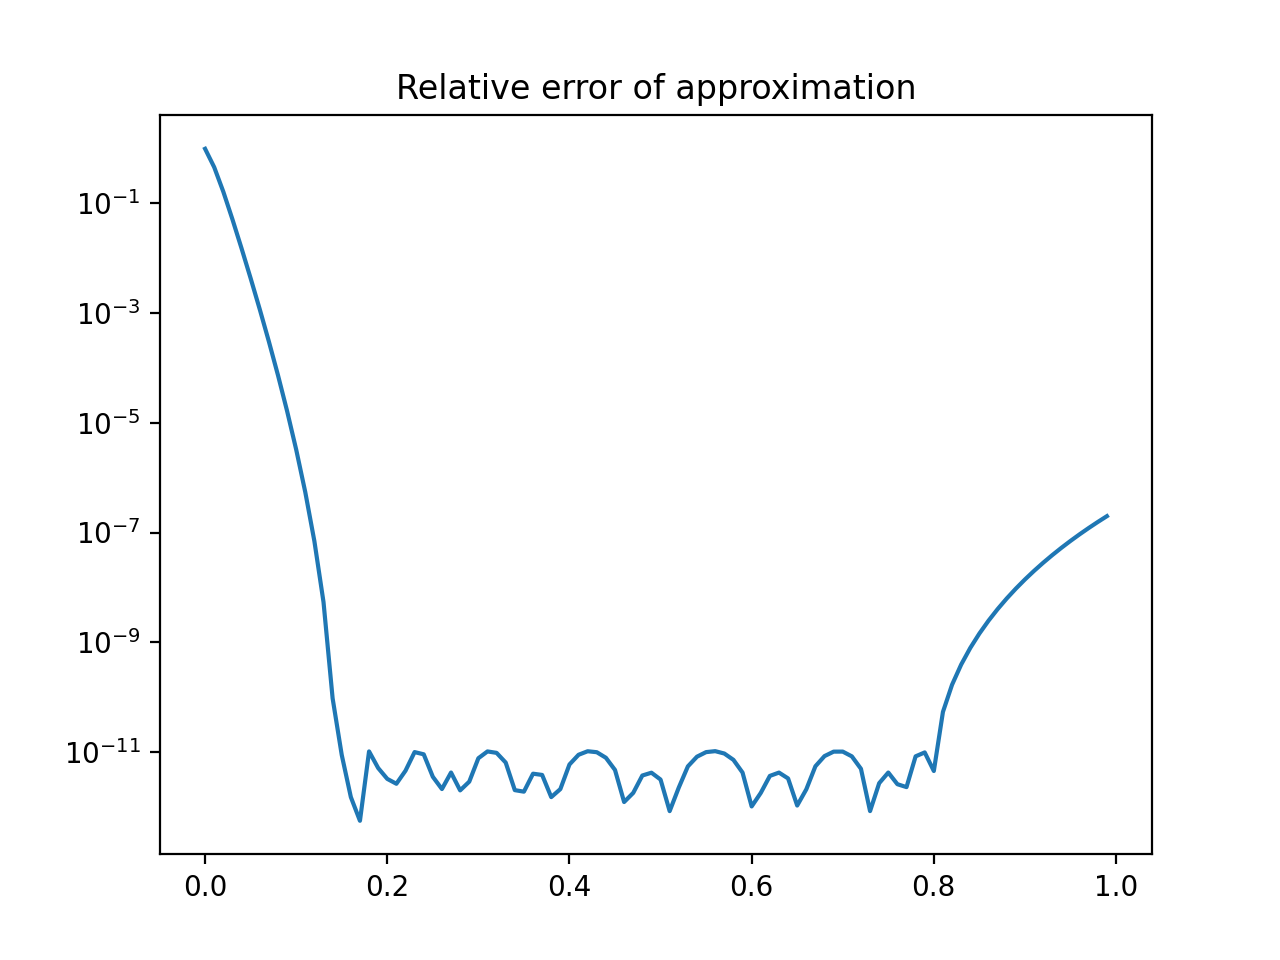

In [3]:
xax = numpy.arange(1e-4, 1.0, 0.01)

plt.figure()
plt.title('Relative error of approximation')
plt.plot(xax, [abs(rat(x*x) * x - 1.0) for x in xax])
plt.yscale('log')

<IPython.core.display.Javascript object>


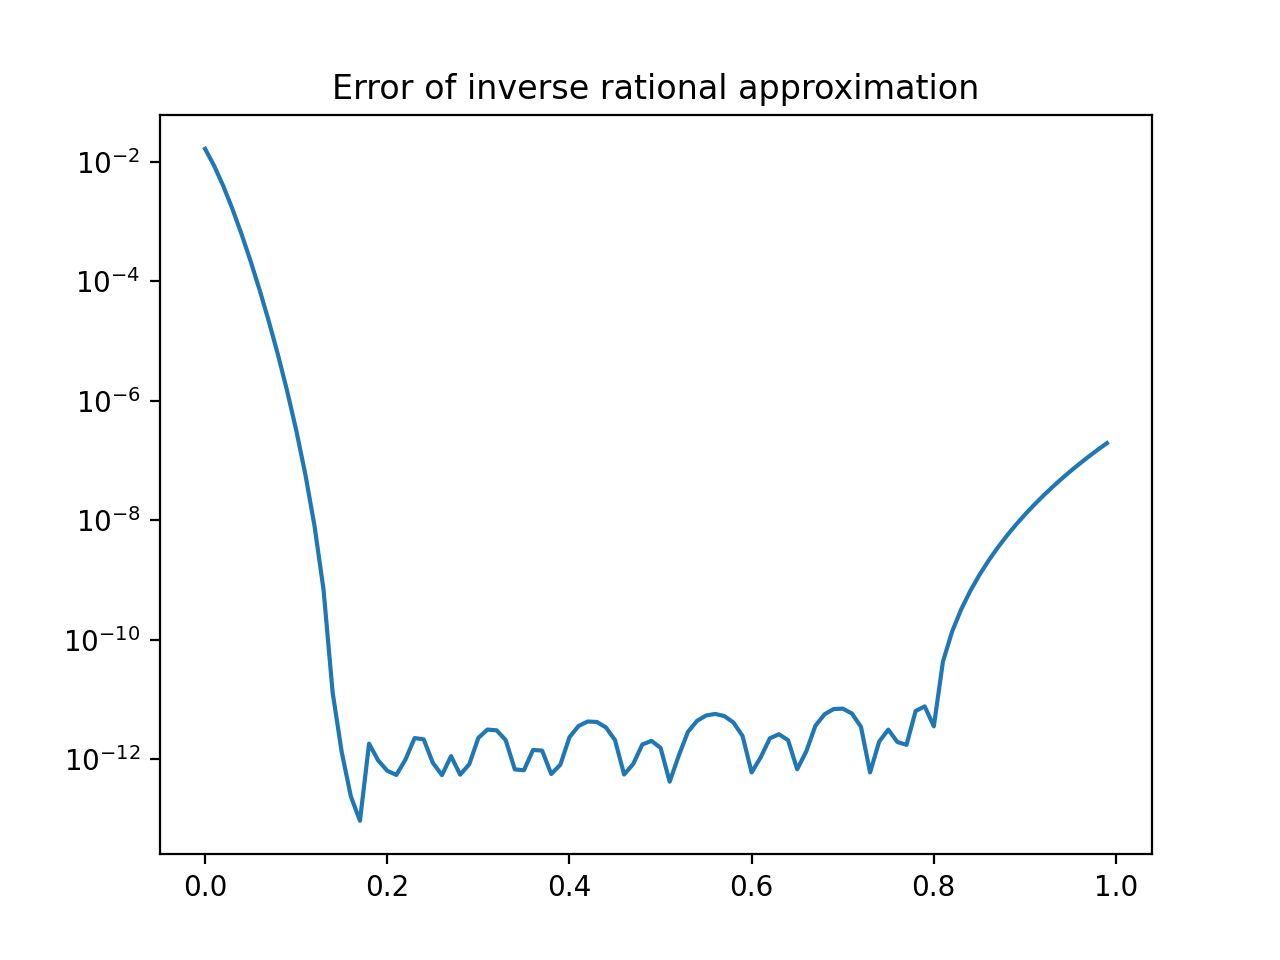

In [4]:
rat_inv = rat.inv()

plt.figure()
plt.title('Error of inverse rational approximation')
plt.plot(xax, [abs(rat_inv(x*x) - x) for x in xax])
plt.yscale('log')